In Order to work with Word2Vec you need to install "gensim" package with the help of below command.

In [1]:
pip install gensim

  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101346 sha256=1fb303e37397bcd368939dd3d5be35532ffd692cd561ba0eb751ad42bf82eca4
  Stored in directory: c:\users\ebabbpa\appdata\local\pip\cache\wheels\bb\1c\9c\412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [1]:
from gensim.models import Word2Vec

In [2]:
sentences = [['i', 'like', 'apple', 'pie', 'for', 'dessert'],
            ['i', 'dont', 'drive', 'fast', 'cars'],
            ['data', 'science', 'is', 'fun'],
            ['chocolate', 'is', 'my', 'favorite'],
            ['my', 'favorite', 'movie', 'is', 'predator']]

In [4]:
w2v = Word2Vec(sentences,min_count=1, size=5)

Notice when constructing the model, I pass in min_count =1 and size = 5. That means it will include all words that occur ≥ 1 time and generate a vector with a fixed length of 5.
Notice when printed, the model displays the count of unique vocab words, array size, and learning rate (default .025)

In [6]:
print(w2v)

Word2Vec(vocab=19, size=5, alpha=0.025)


In [7]:
# access vector for one word
print(w2v['chocolate'])

[0.01135635 0.00535209 0.06072215 0.07708461 0.0146246 ]


C:\Users\ebabbpa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


So here each word will be represented in terms of Vector of fixed length 5.

In [8]:
print(w2v['favorite'])

[-0.053853    0.0393076  -0.05750771 -0.07489672 -0.08306628]


C:\Users\ebabbpa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In Order to see which all words are there in the Vocabulary use the below code.

In [10]:
words = list(w2v.wv.vocab)
print(words)

['i', 'like', 'apple', 'pie', 'for', 'dessert', 'dont', 'drive', 'fast', 'cars', 'data', 'science', 'is', 'fun', 'chocolate', 'my', 'favorite', 'movie', 'predator']


In [12]:
X = w2v[w2v.wv.vocab]
X

C:\Users\ebabbpa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-0.04773656, -0.02283037, -0.03700544,  0.05760916, -0.04727065],
       [ 0.04244933, -0.02432232,  0.00206773,  0.06364617,  0.01977875],
       [-0.0637365 , -0.09173283,  0.02516129,  0.03645008,  0.07189355],
       [-0.03207526, -0.0803313 ,  0.09209522, -0.01923129,  0.02585856],
       [-0.03476797,  0.09517377, -0.01101576,  0.05687603, -0.00725441],
       [-0.09783852, -0.02122864, -0.04475309, -0.04136759,  0.00542956],
       [-0.09066465, -0.02049814,  0.0412379 , -0.08988182,  0.09197472],
       [-0.05416853, -0.0967279 , -0.06245529,  0.03338588, -0.06693397],
       [ 0.03509456, -0.0656772 , -0.02265296, -0.08254953, -0.0854262 ],
       [-0.00823897, -0.09916965,  0.02474985,  0.03573187, -0.02571249],
       [-0.00479005, -0.05009684, -0.02478708,  0.03320211,  0.0006633 ],
       [ 0.04164624, -0.07037939,  0.01377771, -0.04169133, -0.00404389],
       [-0.07838225, -0.06758871,  0.0375312 , -0.00216597,  0.07604183],
       [ 0.02822826,  0.07632778,  0.0

### Visualize Embeddings

Now that the word embeddings have been created using Word2Vec, each word can be represented in terms of a vector with fixed length of 5. So by using the PCA lets flatten from 5 dimensions to 2 dimensions to visualize the relationship between different words.

In [13]:
import matplotlib.pyplot as plt

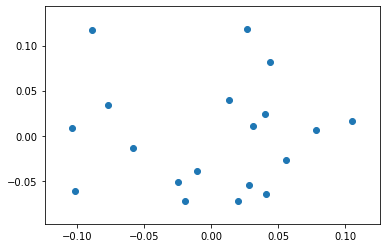

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Reducing from 5 dimensions to 2 dimensions for visualization
results = pca.fit_transform(X)

plt.scatter(results[:,0],results[:,1])

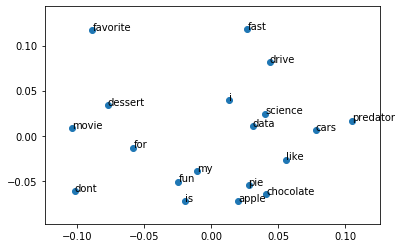

In [16]:
plt.scatter(results[:,0],results[:,1])
words = list(w2v.wv.vocab)

for i,word in enumerate(words):
    plt.annotate(word, xy=(results[i, 0], results[i, 1]))

plt.show()